In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import beta


# First taste of posterior probabilities

## Context:
Imagine a 4 sided globe where you toss and try to figure out what proportion of the globe is made of water (p). W is the number of Water observations, and L is the number of Land observations.

In [2]:
sample = [
    "W",
    "L",
    "W",
    "W",
    "W",
    "L",
    "W",
    "L",
    "W"
]

In [3]:
len(sample)

9

In [4]:
sum_w = len(list(filter(lambda x: x == "W", sample)))
sum_w

6

In [5]:
sum_l = len(list(filter(lambda x: x == "L", sample)))
sum_l

3

In [6]:
p_list = [0, 0.25, 0.5, 0.75, 1]

In [7]:
def basic_nominal_posterior(sample:list, p:float, w:int, l:int):
    """
    Posterior distribution for the Garden of forks problem

    p is the proportion of water on the 4 sided globe
    w is the number of water observations
    l is the number of land observations
    
    """
    return ((4 * p) ** w) * ((4- 4 * p) ** l)

In [8]:
posterior_out = {}

for p in p_list:
    posterior = basic_nominal_posterior(sample, p, sum_w, sum_l)
    posterior_out[p] = posterior




In [9]:
posterior_out

{0: 0, 0.25: 27.0, 0.5: 512.0, 0.75: 729.0, 1: 0}

In [10]:
729/1268

0.5749211356466877

In [11]:
# Convert number of possible outcomes to probabilities
total_num_outcomes = sum(posterior_out.values())
for p, v in posterior_out.items():
    posterior_out[p] = v / total_num_outcomes


In [12]:
posterior_out.values()

dict_values([0.0, 0.021293375394321766, 0.4037854889589905, 0.5749211356466877, 0.0])

In [13]:
sum(posterior_out.values())

1.0

Text(0, 0.5, 'Posterior Probabilities')

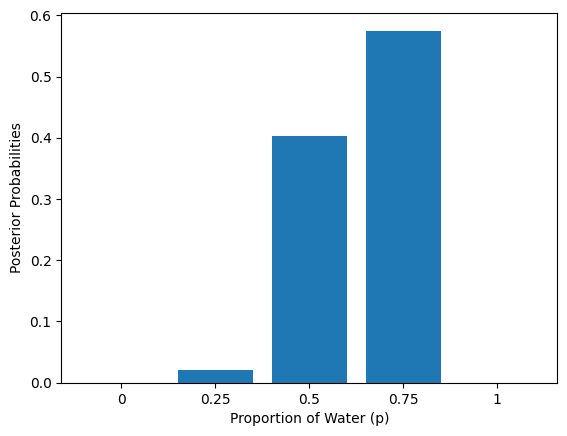

In [14]:
plt.bar(range(len(posterior_out)), posterior_out.values(), align='center')
plt.xticks(range(len(posterior_out)), posterior_out.keys())
plt.xlabel("Proportion of Water (p)")
plt.ylabel("Posterior Probabilities")

In [15]:
# Validate that sum of all posterior probabilities is 1

sum(posterior_out.values())

1.0

# Implement Generative Model

In [16]:
def globe_sampling(p, N=10):
    """
    Simulate N tosses of the 4 sided globe
    """
    return np.random.choice(a = ["W", "L"], size=int(N), p=[p, 1-p])


In [17]:
globe_sampling(0.5, 10)

array(['L', 'W', 'W', 'L', 'L', 'L', 'L', 'L', 'W', 'W'], dtype='<U1')

## How to test generative model?

### Test extreme settings (p=1, p=0)

In [18]:
# Test p=0
globe_sampling(0, 10)

array(['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L'], dtype='<U1')

In [19]:

globe_sampling(1, 10)

array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'], dtype='<U1')

## Test that large samples converge to the p value

In [20]:
len(list(filter(lambda x: x == "W", sample)))

6

In [21]:
len(list(filter(lambda x: x == "W",globe_sampling(p=0.5, N=1e4)))) / 1e4

0.4955

# Sampling from the Posterior Distribution

## Why is the posterior distribution of infinite N experiments == Beta Distribution?

https://www.youtube.com/watch?v=juF3r12nM5A 

In [47]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

## Demonstrating that as more samples are added with the same ratio of a:b, the Beta distribution narrows. This represents a decrease in uncertainty

(array([1.33687643, 1.33687643, 2.67375286, 4.01062929, 4.01062929]),
 array([0.4024352 , 0.47723643, 0.55203766, 0.62683889, 0.70164012,
        0.77644134]),
 <BarContainer object of 5 artists>)

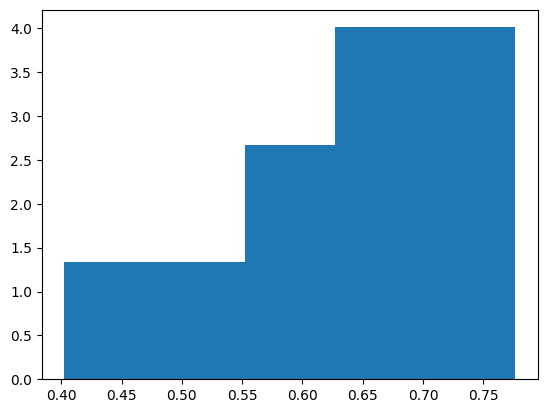

In [ ]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 7+1, b = 3+1, size = 10), density = True, bins = "auto") # the underlying implication is that probability of a is always a/(a+b)

(array([0.36580038, 2.1948023 , 4.02380421, 5.12120536, 7.31600765,
        8.04760842, 5.85280612, 3.29220344, 0.36580038]),
 array([0.56995312, 0.59729044, 0.62462775, 0.65196507, 0.67930238,
        0.7066397 , 0.73397701, 0.76131432, 0.78865164, 0.81598895]),
 <BarContainer object of 9 artists>)

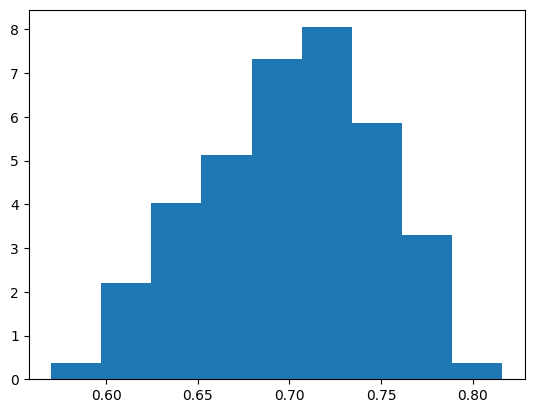

In [44]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 70+1, b = 30+1, size = 100), density = True, bins = "auto")


(array([ 0.25941386,  0.25941386,  0.25941386,  1.29706931,  1.29706931,
         2.33472475,  4.66944951,  8.30124357, 10.63596833, 16.34307328,
        20.49369507, 23.60666141, 24.38490299, 28.53552478, 24.12548913,
        24.64431685, 23.60666141, 14.00834853,  9.33889902,  8.30124357,
         4.66944951,  3.63179406,  1.81589703,  1.55648317,  1.03765545]),
 array([0.64783423, 0.65168907, 0.65554391, 0.65939876, 0.6632536 ,
        0.66710845, 0.67096329, 0.67481814, 0.67867298, 0.68252782,
        0.68638267, 0.69023751, 0.69409236, 0.6979472 , 0.70180204,
        0.70565689, 0.70951173, 0.71336658, 0.71722142, 0.72107626,
        0.72493111, 0.72878595, 0.7326408 , 0.73649564, 0.74035049,
        0.74420533]),
 <BarContainer object of 25 artists>)

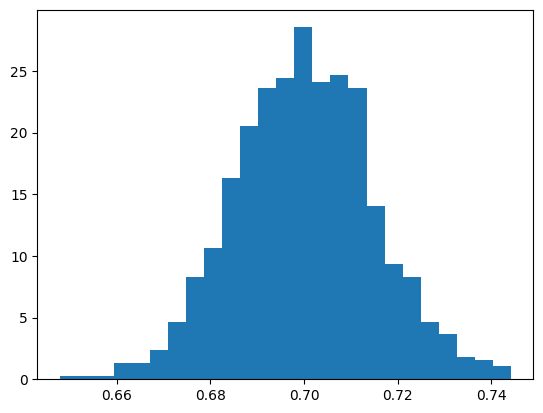

In [43]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 700+1, b = 300+1, size = 1000), density = True, bins = "auto")

(array([ 0.19702401,  0.        ,  0.39404803,  0.78809605,  0.39404803,
         1.77321611,  1.77321611,  3.94048025,  4.7285763 ,  5.12262433,
         6.3047684 ,  9.85120063, 13.39763285, 17.92918514, 26.40121768,
        30.14467392, 35.07027423, 45.5125469 , 45.11849887, 51.22624326,
        56.5458916 , 56.5458916 , 58.91017975, 65.21494816, 59.89529982,
        57.13696364, 56.15184358, 48.27088308, 42.55718671, 37.6315864 ,
        30.93276997, 27.38633775, 23.05180947, 18.71728119, 13.00358483,
        11.42739273,  5.71369636,  4.33452828,  3.54643223,  3.34940821,
         2.36428815,  0.78809605,  0.59107204,  0.19702401,  0.19702401,
         0.19702401,  0.        ,  0.        ,  0.39404803]),
 array([0.67609766, 0.67711277, 0.67812787, 0.67914298, 0.68015808,
        0.68117319, 0.68218829, 0.68320339, 0.6842185 , 0.6852336 ,
        0.68624871, 0.68726381, 0.68827892, 0.68929402, 0.69030913,
        0.69132423, 0.69233934, 0.69335444, 0.69436955, 0.69538465,
        0

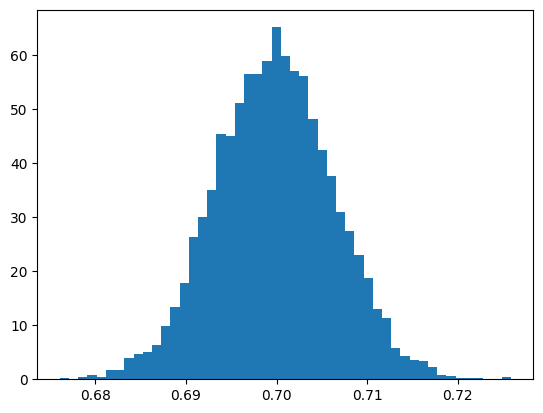

In [48]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 3500+1, b = 1500+1, size = 5000), density = True, bins = "auto")

## Detour: Thompson Sampling
https://www.youtube.com/watch?v=nkyDGGQ5h60

## Sampling from the beta distribution (posterior distribution)

In [22]:
from scipy.stats import beta

random_sample = beta.rvs(a = 6+1, b = 3+1, size = 1000)

# +1 is needed for a and b because the underlying formula uses (a-1) and (b-1)

In [23]:
random_sample

array([0.60070906, 0.42295296, 0.30034486, 0.64108009, 0.63479686,
       0.44774704, 0.52689862, 0.7393186 , 0.50275616, 0.55566885,
       0.52615026, 0.71382795, 0.71225102, 0.70126583, 0.59400117,
       0.48540882, 0.39447241, 0.75745315, 0.61422389, 0.88750573,
       0.61201671, 0.54676311, 0.73456606, 0.7257715 , 0.63821684,
       0.3547671 , 0.51863844, 0.72220951, 0.52446393, 0.47667474,
       0.59383482, 0.8025053 , 0.63947439, 0.59000227, 0.64977897,
       0.63427615, 0.52462905, 0.39413757, 0.67758516, 0.3935687 ,
       0.91362262, 0.66031284, 0.75698753, 0.68754686, 0.76751629,
       0.77812647, 0.38083428, 0.46771852, 0.57425831, 0.75469823,
       0.72547733, 0.4139256 , 0.57695376, 0.57620786, 0.47325901,
       0.88734938, 0.50429996, 0.67420206, 0.38675601, 0.49076225,
       0.79931914, 0.80375568, 0.61298544, 0.71673026, 0.52706691,
       0.72523304, 0.61975874, 0.53108545, 0.66504125, 0.80230803,
       0.71999252, 0.62382644, 0.63917789, 0.7061392 , 0.47681

(array([0.02568456, 0.05136911, 0.05136911, 0.12842278, 0.28253011,
        0.33389923, 0.6421139 , 0.97601312, 1.61812702, 2.13181813,
        2.15750269, 2.77393203, 2.74824747, 2.15750269, 2.82530114,
        2.41434825, 1.77223435, 1.41265057, 0.92464401, 0.25684556]),
 array([0.14708759, 0.18602149, 0.22495539, 0.26388929, 0.3028232 ,
        0.3417571 , 0.380691  , 0.41962491, 0.45855881, 0.49749271,
        0.53642661, 0.57536052, 0.61429442, 0.65322832, 0.69216223,
        0.73109613, 0.77003003, 0.80896393, 0.84789784, 0.88683174,
        0.92576564]),
 <BarContainer object of 20 artists>)

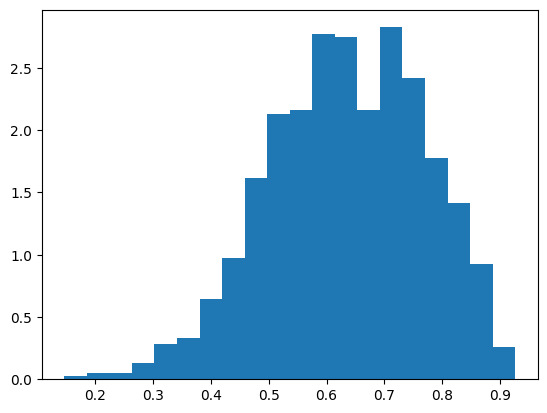

In [25]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 6+1, b = 3+1, size = 1000), density = True, bins = "auto")

## Deriving the Posterior Predictive Distribution